<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

>[Deep Learning](#scrollTo=TIdZT6uXjBSu)

>>[Neural Networks](#scrollTo=KTbgah9-jGBc)

>>>[Neural Networks (Feedforward)](#scrollTo=SA-Ib5T69vck)

>>>[Nonlinearities](#scrollTo=wA2oh48n-Xn9)

>>[Cost](#scrollTo=praACJtNn8MF)

>>>[Linear](#scrollTo=6JR-JWuRu7Fp)

>>>>[Squared Error](#scrollTo=KfwJzpMnrTBz)

>>>>[Log-Likelihood - Gaussian Distributed](#scrollTo=j48p6Mchrsz9)

>>>[Binary Classification](#scrollTo=rYVf2FVXuQrT)

>>>>[Log-Likelihood - Bernoulli Distributed](#scrollTo=E0IqjMuxvC9W)

>>>[Multiclass Classification](#scrollTo=bJI67Nsov8dw)

>>>>[Log-Likelihood - Categorical Distribution](#scrollTo=mJECqzt8xq2Q)

>>[Backpropagation](#scrollTo=wWqijUBLn9Sk)

>>>[Softmax Derivative](#scrollTo=3mHAdNB02QFC)

>>>[Chain Rule](#scrollTo=YIgTanYl6Xmk)

>>>>[Law of total derivatives](#scrollTo=wZjkBLU6ov0X)

>>>[Applying the law of total derivatives](#scrollTo=uSbcdMf8qyyf)

>>>[Implementation](#scrollTo=FvoOUFs8tjTa)

>>>[General Pattern](#scrollTo=UwhCFvqi4lml)



## Neural Networks

- One or more hidden layers
- Every node in one layers i connected to every node in the next layer
- signals get transmitted from the input, to the hidden layers, to the output.
- the output is aiming for a target


Nueral networks are networks of neurons.
Logisitic unit is a neuron, **A neural network is just layers of logistic regression units.**

NN are trained using backpropagation. The error gets "propagated" backwards. The weights get updated based on this propagated error.




### Neural Networks (Feedforward)

W(i,j) goes from x(i) to z(j)

$$
z_j = \sigma(\sum_i(W_{ij}x_i)+b_j) \\
p(y|x) = \sigma(\sum_j(v_jz_j)+c)
$$

(v is output of the hidden nodes (z)

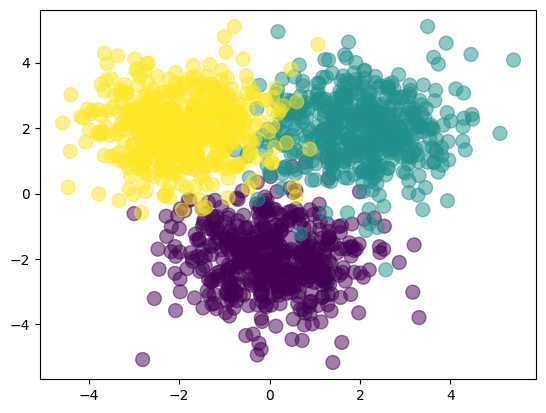

In [ ]:
# Feedforward
import numpy as np
import matplotlib.pyplot as plt

Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [ ]:
# randomly initialize weights
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [ ]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [ ]:
def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1) # sigmoid
    # Z = np.tanh(X.dot(W1) + b1) # tanh
    # Z = np.maximum(X.dot(W1) + b1, 0) # relu
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

In [ ]:
# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [ ]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

# verify we chose the correct axis
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights:", classification_rate(Y, P))

Classification rate for randomly chosen weights: 0.3453333333333333


### Nonlinearities

- Sigmoid
$$
\sigma = \frac{1}{1+e^{-x}}
$$

- Tanh

$$
\tanh = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- ReLu

$$
\text{relu} = \max(0,x)
$$

- Softmax

$$
\sigma(\vec{z})_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{K} e^{z_{j}}}
$$

In [ ]:
# Softmax

import numpy as np
logit = np.random.randn(100, 5)

expo = np.exp(logit)

answer = expo / expo.sum(axis=1, keepdims=True)

answer[:5]

array([[0.04098939, 0.17594422, 0.48404909, 0.05277874, 0.24623857],
       [0.08555078, 0.12978908, 0.08533468, 0.33947689, 0.35984857],
       [0.01356773, 0.19048594, 0.10127627, 0.14100551, 0.55366456],
       [0.08754871, 0.26824994, 0.29453824, 0.10183476, 0.24782834],
       [0.29266622, 0.07995101, 0.13389914, 0.17429559, 0.31918804]])

In [ ]:
answer.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Cost

### Linear

#### Squared Error

We need to minimize the error
$$
\text{SE} = \sum_{n=1}^N (\text{target}_n - \text{prediction}_n)^2 = \sum^N_{n=1}(t_n-y_n)^2
$$

#### Log-Likelihood - Gaussian Distributed

Minimizing the SE is the same as maximizing the log-likelihood when the error is Gaussian distributed.

$$
t_n \sim N(y_n, \sigma^2) \\
\text{Likelihood} = L = \prod_{n=1}^N \frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{1}{2\sigma^2}(t_n - y_n)^2)
$$

We want to optimize the function of $w$

$$
y_n = f(x_n;w) \\
w=\text{argmax}_w L
$$

$L$ is the Likelihood

It's more convenient to maximize the log of $L$ rather than $L$ itself.

$$
\begin{align*}
\log L &= \sum_{n=1}^N \log [ \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(t_n - y_n )^2)] \\
&= \sum_{n=1}^N  [\log \frac{1}{\sqrt{2\pi\sigma^2}}+ \log\exp(-\frac{1}{2\sigma^2}(t_n - y_n )^2)]\\
&= \sum_{n=1}^N  [\log \frac{1}{\sqrt{2\pi\sigma^2}}+ (-\frac{1}{2\sigma^2}(t_n - y_n )^2)] \\
&= C_1 - C_2 \sum_{n=1}^N(t_n - y_n )^2 \\
\end{align*}
$$

### Binary Classification

Slightly more complicated scenario. we use binary cross-entropy cost function instead of squared error

$$
\text{Loss} = - \sum_{n=1}^N \{ t_n \log y_n + (1 - t_n ) \log ( 1- y_n) \}
$$

#### Log-Likelihood - Bernoulli Distributed

The MLE equivalent is where the target is a Bernoulli distributed random variable with "probability of success" as the prediction

$$
t_n \sim \text{Bernoulli}(y_n) \\
L = \prod_{n=1}^N y_n^{t_n} (1-y_n)^{(1-t_n)}
$$

If we take the negative log-likelihood we just get back the binary cross-entropy.




### Multiclass Classification

Use categorical distribution

$$
L = \prod_{n=1}^N\prod_{k=1}^K y_{nk}^{t_{nk}}
$$

- K is the number of categories

#### Log-Likelihood - Categorical Distribution

$$
\text{Categorical cross entropy loss} =
- \sum_{n=1}^N \sum_{k=1}^K t_{nk} \log y_{nk}
$$

## Backpropagation

1. Set up a cost function, J
2. Take the gradient of J wrt weights w.
  - Repeat till coveregence

$$
a = W^T x \\
y = \text{softmax}(a) \\
J = \sum_{n=1}^N\sum_{k=1}^K t_{nk} \log y_{nk} \\
$$

To calculate the derivative of $J$, we can use the chain rule.

$
J = f(z), z=g(y), y=h(x) \\
dJ/dx = \frac{dJ}{dz} \frac{dz}{dy}\frac{dy}{dx} =
f'(z) g'(y) h'(x) \\
$

$$
\frac{\partial J}{\partial W_{ik}} =
\sum_{n=1}^N\sum_{k'=1}^K
\frac{\partial J_{nk'}}{\partial y_{nk'}}
\frac{\partial y_{nk'}}{\partial a_{nk}}
\frac{\partial a_{nk}}{\partial W_{ik}}
$$

### Softmax Derivative

write it without a "denominator" so that we can apply the product rule

$$
\frac{\partial y_{nk'}}{\partial a_{nk}} =
\frac{\partial}{\partial a_{nk}} \exp (a_{nk'})
\left \{
\sum_j \exp (a_{nj})
\right \}^{-1} \\
$$

- First consider the scenario where $k' \ne k$ (first term is constant)

$$
\frac{\partial y_{nk'}}{\partial a_{nk}} =
\exp (a_{nk'})(-1)
\left \{
\sum_j \exp (a_{nj})
\right \}^{-2}
\exp (a_{nk})
\\
$$


$$
\frac{\partial y_{nk'}}{\partial a_{nk}} =
(-1) \frac{\exp (a_{nk'})}{\sum_j \exp (a_{nj})}
\frac{\exp (a_{nk})}{\sum_j \exp (a_{nj})} =
- y_{nk'}y_{nk} \\
$$

- if $k' =k$, then we have to differentiate both terms.

$$
\frac{\partial y_{nk}}{\partial a_{nk}} =
\exp (a_{nk})
\left \{
\sum_j \exp (a_{nj})
\right \}^{-1}
- \exp (a_{nk})^2
\left \{
\sum_j \exp (a_{nj})
\right \}^{-2}
\\
$$

$$
\frac{\partial y_{nk}}{\partial a_{nk}} =
\frac{\exp (a_{nk})}{\sum_j \exp (a_{nj})}
- \frac{\exp (a_{nk})^2}{\left (
\sum_j \exp (a_{nj})
\right )^{2} } =
y_{nk}-y_{nk}^2 =
y_{nk'}(1-y_{nk})
$$

Combing the two

$$
\delta_{kk'} = 1 \text{ if } k' = k \\
\delta{kk'} = 0 \text{ if } k' \ne k \\
\frac{\partial y_{nk'}}{\partial a_{nk}} = y_{nk'}( \delta_{kk'} - y_{nk})
$$

### Chain Rule

**Derivative of Loss**

$$
J_{nk'} = t_{nk'} \log y_{nk'} \\
\frac{\partial J_{nk'}}{\partial y_{nk'}} =
\frac{t_{nk'}}{y_{nk'}}  \\
$$

**Derivative of Equation**

$$
a_{nk} = W_{:,k}^T x_n \\
\frac{\partial a_{nk}}{\partial W_{ik}} =
x_{ni}
$$

Chain rule:

$$
\begin{align*}
\frac{t_{nk'}}{y_{nk'}}
\frac{\partial J}{\partial W_{ik}} &=
\sum_{n=1}^N \sum_{k'=1}^K
\frac{t_{nk'}}{y_{nk'}}
 y_{nk'}( \delta_{kk'} - y_{nk})
 x_{ni} \\ &=
\sum_{n=1}^N \sum_{k'=1}^K
t_{nk'}( \delta_{kk'} - y_{nk})
 x_{ni} \\ &=
 \sum_{n=1}^N (
\sum_{k'=1}^K t_{nk'}\delta_{kk'} -
\sum_{k'=1}^K t_{nk'} y_{nk}
 )  x_{ni} \\ &=
  \sum_{n=1}^N (
 t_{nk} - y_{nk}
 )  x_{ni}
\end{align*} \\
\nabla J = X^T (T-Y)
$$

Our NN:

- Input: X(N×D)
- Hidden: Z(N×M)
- Output: X(N×K)
- Input to Hidden: W(D×M) + b(M)
- Output from Hidden: V(M×K) + c(K)

*Goal* build cost function, find gradients

- Input→Hidden $z = \sigma (W^T x+b)$
- Hidden→Output $y = \text{softmax} (V^T z+c)$
- Output→Loss $J = \sum_{n=1}^N\sum_{k=1}^K t_{nk} \log y_{nk}$

$$
\frac{\partial J}{\partial V_{mk}} = \sum_{n=1}^N\sum_{k'=1}^K \frac{\partial J_{nk'}}{\partial y_{nk'}}\frac{\partial y_{nk'}}{\partial a_{nk}}\frac{\partial a_{nk}}{\partial V_{mk}}
 \\[1cm]
\frac{\partial J}{\partial c_{k}} = \sum_{n=1}^N\sum_{k'=1}^K \frac{\partial J_{nk'}}{\partial y_{nk'}}\frac{\partial y_{nk'}}{\partial a_{nk}}\frac{\partial a_{nk}}{\partial c_{k}}
\\[1.5cm]
\frac{\partial a_{nk}}{\partial V_{mk}} = z_{nm}, \\
\frac{\partial a_{nk}}{\partial c_{k}} = 1
\\[1.5cm]
\frac{\partial J}{\partial V_{mk}} = \sum_{n=1}^N (t_{nk}-y_{nk}) z_{nm} \\
\frac{\partial J}{\partial c_{k}} = \sum_{n=1}^N (t_{nk}-y_{nk})\\[1cm]
\nabla_v J = Z^T (T-Y)
$$

`grad_c = np.sum(T-Y, axis=0)`

#### Law of total derivatives

Suppose we are tracking the position of some particle in 3D space at regular time steps t, we have position = x(t), y(t), z(t).

Suppose we have some function of position:
f(x,y,z)

$$
\frac{df}{dt}= \frac{df}{dx}\frac{dx}{dt}+
\frac{df}{dy}\frac{dy}{dt}+
\frac{df}{dz}\frac{dz}{dt}
$$

We can use the same rule for any number of variables parameterized by t.

$$
x_k(t) \text{ for } k = 1\dots K \\
\frac{df}{dt}=\sum_{k=1}^K \frac{\partial f}{\partial x_k}\frac{dx_k}{dt}
$$

### Applying the law of total derivatives

if a is layer one, z is the sigmoid of it, and α is the second layer, and y is our function, and J is the cost, we'd have:

$$
\frac{\partial J}{\partial W_{dm}} = \sum_{k=1}^K\sum_{n=1}^N\sum_{k'=1}^K
\frac{\partial J_{nk'}}{\partial y_{nk'}}
\frac{\partial y_{nk'}}{\partial a_{nk}}
\frac{\partial a_{nk}}{\partial z_{nm}}
\frac{\partial z_{nm}}{\partial \alpha_{nm}}
\frac{\partial \alpha_{nm}}{\partial W_{dm}}
 \\[1cm]
 \frac{\partial J}{\partial b_{m}} = \sum_{k=1}^K\sum_{n=1}^N\sum_{k'=1}^K
\frac{\partial J_{nk'}}{\partial y_{nk'}}
\frac{\partial y_{nk'}}{\partial a_{nk}}
\frac{\partial a_{nk}}{\partial z_{nm}}
\frac{\partial z_{nm}}{\partial \alpha_{nm}}
\frac{\partial \alpha_{nm}}{\partial b_{m}}
\\[2cm]
\frac{\partial J}{\partial W_{dm}} = \sum_{k=1}^K\sum_{n=1}^N
(t_{nk}-y_{nk}) V_{mk} z_{nm} (1-z_{nm}) x_{nd} \\
\frac{\partial J}{\partial b_{m}} = \sum_{k=1}^K\sum_{n=1}^N
(t_{nk}-y_{nk}) V_{mk} z_{nm} (1-z_{nm})
\\[1cm]
\nabla_wJ = X^T \left \{[ (T-Y)V^T] \odot  Z \odot (1-Z) \right \}
$$

`grad_b = np.sum((T-Y).dot(V.T) * Z * (1-Z), axis=0)`

### Implementation

In [6]:
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z


# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total


def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # slow
    # ret1 = np.zeros((M, K))
    # for n in xrange(N):
    #     for m in xrange(M):
    #         for k in xrange(K):
    #             ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # a bit faster - let's not loop over m
    # ret2 = np.zeros((M, K))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # even faster  - let's not loop over k either
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # fastest - let's not loop over anything
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4


def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    # ret1 = np.zeros((X.shape[1], M))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         for m in xrange(M):
    #             for d in xrange(D):
    #                 ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # fastest
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2


def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)


def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()


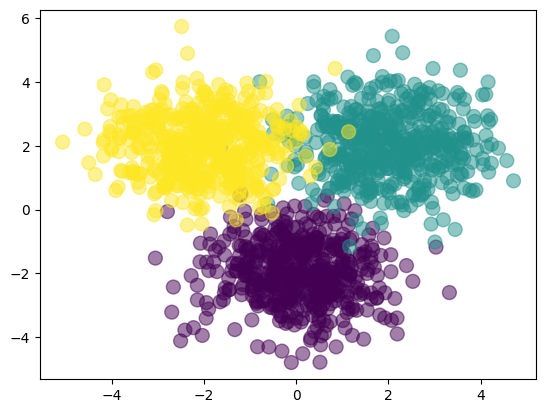

In [7]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

cost: -3147.180844402328 classification_rate: 0.26866666666666666
cost: -142.7588040059537 classification_rate: 0.968
cost: -123.08848497133182 classification_rate: 0.9693333333333334
cost: -118.58384015184421 classification_rate: 0.9693333333333334
cost: -116.67606916900948 classification_rate: 0.9686666666666667
cost: -115.59383695546072 classification_rate: 0.9693333333333334
cost: -114.86569239628446 classification_rate: 0.97
cost: -114.32077560471544 classification_rate: 0.97
cost: -113.88426454456248 classification_rate: 0.97
cost: -113.51891401775143 classification_rate: 0.97


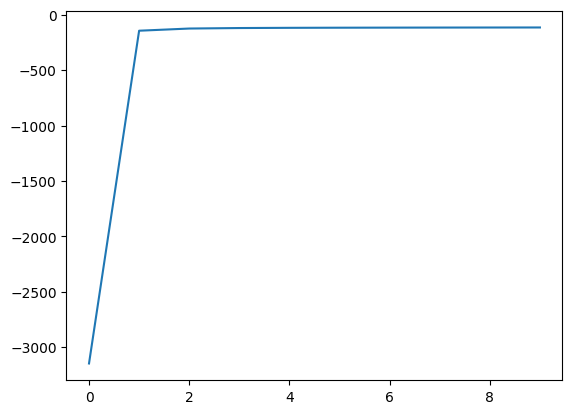

In [8]:
# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 1e-3
costs = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    gW2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)
    gW1 = derivative_w1(X, hidden, T, output, W2)
    gb1 = derivative_b1(T, output, W2, hidden)

    W2 += learning_rate * gW2
    b2 += learning_rate * gb2
    W1 += learning_rate * gW1
    b1 += learning_rate * gb1

plt.plot(costs)
plt.show()

### General Pattern

Pattern repeat in each layer:

$$
\delta^{(L)} = t_{nk} - y_{nk} \\
\delta^{(l)}_{nm^{(l)}} = \sum^{M^{(l+1)}}_{m^{(l+1)}=1} \delta^{(l+1)}_{nn^{(l+1)}}W^{(l+1)}_{m^{(l)}m^{(l+1)}}z^{(l)'}_{nm^{(l)}}, \text{ for } l=1\dots L-1
$$

Vectorized:

$$
\delta^{(L)} =T - Y \\
\delta^{(l)} = (\delta^{(l+1)}W^{(l+1)T})\odot Z^{(l)'},  \text{ for } l=1\dots L-1 \\[1cm]
$$

$$
\nabla_{w^{(l)}}J= Z^{(l-1)T}\delta^{(l)} \\
\nabla_{b^{(l)}}J= \text{sum}(\delta^{(l)}, \text{axis}=0)=\delta^{(l)T}1_N \\
$$